感知机是一种线性分类模型，主要用于二分类问题。
它通过寻找一个超平面对数据进行分类。给定一个训练数据集，
感知机的目标是找到一个权重向量，使得所有的x可以满足
yi*(w⋅xi+b)>0


伪代码如下：
# 初始化权重向量 w 和偏置 b
# 设置学习率 
# 当存在被错误分类的样本时，继续执行
    # 遍历每一个样本 
    #每一个样本 :
        # 如果样本被错误分类
            # 更新权重向量 w
            # 更新偏置 b
            # 标记为存在错误分类
    # 如果所有样本都被正确分类，则退出循环


    
代码实现如下。
A,B均属于x2
该classification，由于数据少，同时缺少lossfuction来对系统反馈，对w的选择有很大的裕度。
如图，很明显对B的分类并不友好，有很大的错误可能性，或许支持向量机SVM会更加友好。



[0. 0.]
权重向量: [ 0.179 -0.156]
偏置: 0.05
A点类别:
X2
B点类别:
X2


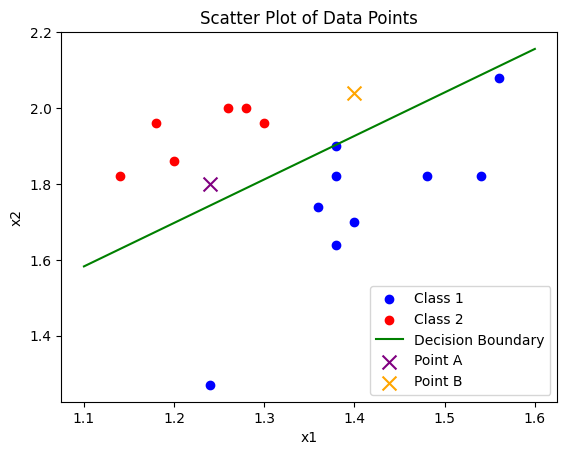

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([[1.24, 1.27], [1.36, 1.74], [1.38, 1.64], [1.38, 1.82],
               [1.38, 1.90], [1.40, 1.70], [1.48, 1.82], [1.54, 1.82], [1.56, 2.08]])
x2 = np.array([[1.14, 1.82], [1.18, 1.96], [1.20, 1.86], [1.26, 2.0],
               [1.28, 2.0], [1.3, 1.96]])

y1 = np.ones(x1.shape[0])
y2 = -1 * np.ones(x2.shape[0])

X = np.vstack((x1, x2))
Y = np.hstack((y1, y2))

# 初始化
w = np.zeros(2)
print(w)
b = 0
learning_rate = 0.05
max_iter = 1000

# 感知机训练
for _ in range(max_iter):
    misclassified = False
    for i in range(15):
        if Y[i] * (np.dot(w, X[i]) + b) <= 0:
            w += learning_rate * Y[i] *X[i]
            b += learning_rate * Y[i]
            misclassified = True
    if not misclassified:
        break

print("权重向量:", w)
print("偏置:", b)

'====================================================================================================='
'                             任务四                                                      '

# 分类点A和B
A = np.array([1.24, 1.8])
B = np.array([1.40, 2.04])

# 定义分类函数
def classify(point, w, b):
    return np.sign(np.dot(w, point) + b)

# 分类结果
category_A = classify(A, w, b)
category_B = classify(B, w, b)


def clssification(i):
    if i>0:
        print('X1')
    else:
        print('X2')



print("A点类别:" )
clssification(category_A)
print("B点类别:")
clssification(category_B)


x1_x = x1[:, 0]
x1_y = x1[:, 1]

x2_x = x2[:, 0]
x2_y = x2[:, 1]

# 绘制散点图
plt.scatter(x1_x, x1_y, color='blue', label='Class 1')
plt.scatter(x2_x, x2_y, color='red', label='Class 2')

x = np.linspace(1.1, 1.6, 100)  
y = -(w[0] * x + b) / w[1]  
plt.plot(x, y, color='green', label='Decision Boundary')

A = np.array([1.24, 1.8])
B = np.array([1.40, 2.04])
plt.scatter(A[0], A[1], color='purple', label='Point A', marker='x', s=100)
plt.scatter(B[0], B[1], color='orange', label='Point B', marker='x', s=100)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot of Data Points')
plt.legend()
plt.show()


使用fisher算法：
基本原理：
Fisher判别分析是一种线性判别分析方法，旨在找到能使两类别之间的距离最大、类内方差最小的投影方向。其目标是通过将高维特征投影到一维子空间上，使得同类样本的投影点尽可能拥有相似的均值，不同类别的样本尽可能分开。这种方法适用于二分类问题。

程序伪代码：
计算类别内散度矩阵和类别间散度矩阵。
计算投影方向向量（权重向量）。
利用投影方向将样本投影到一维空间。
根据投影后的样本数据，设定阈值进行分类


分类结果相同

[[ 7.01285224]
 [-3.11637055]]
[0.40219289]
[0.45094483]
[0.45747676]
Point A belongs to Class 2
Point B belongs to Class 2


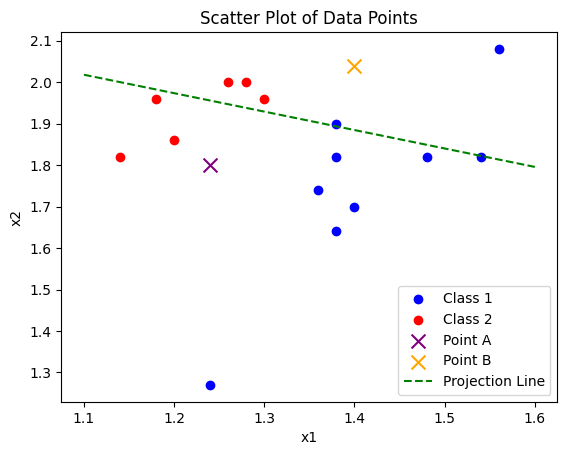

In [10]:

# 计算两个类别的均值向量
mean_x1 = np.mean(x1, axis=0)
mean_x2 = np.mean(x2, axis=0)

# 计算类内散度矩阵
S1 = np.dot((x1 - mean_x1).T, (x1 - mean_x1))
S2 = np.dot((x2 - mean_x2).T, (x2 - mean_x2))
Sw = S1 + S2

# 计算类间散度矩阵
mean_diff = np.atleast_2d(mean_x1 - mean_x2).T
Sb = np.dot(mean_diff, mean_diff.T)

# 计算Sw的逆矩阵
Sw_inv = np.linalg.inv(Sw)

# 计算最佳投影方向
z = np.dot(Sw_inv, mean_diff)
print(z)

z = z/ np.linalg.norm(z)
# 计算投影值
A_proj = np.dot(A, z)
print(A_proj)
B_proj = np.dot(B, z)
print(B_proj)
# 计算阈值
threshold = (np.dot(np.mean(x1, axis=0), z) + np.dot(np.mean(x2, axis=0), z)) / 2
print(threshold)

# 根据投影值比较判断类别
if A_proj > threshold:
    print("Point A belongs to Class 1")
else:
    print("Point A belongs to Class 2")

if B_proj > threshold:
    print("Point B belongs to Class 1")
else:
    print("Point B belongs to Class 2")


plt.scatter(x1_x, x1_y, color='blue', label='Class 1')
plt.scatter(x2_x, x2_y, color='red', label='Class 2')

plt.scatter(A[0], A[1], color='purple', label='Point A', marker='x', s=100)
plt.scatter(B[0], B[1], color='orange', label='Point B', marker='x', s=100)

'''x = np.linspace(1.1, 1.6, 100)  
y =- z[0] * x  / z[1] 
plt.plot(x, y, color='green', label='Decision Boundary')'''

# 绘制投影线
x_values = np.array([1.1, 1.6])
y_values = z[1] /z[0] * (x_values - np.mean([A[0], B[0]])) + np.mean([A[1], B[1]])
plt.plot(x_values, y_values, color='green', linestyle='--', label='Projection Line')

'''# 绘制投影点
plt.scatter(A_proj*z[0]+np.mean([A[0], B[0]]), A_proj*z[1]+np.mean([A[1], B[1]]), color='purple', marker='o', s=100)
plt.scatter(B_proj*z[0]+np.mean([A[0], B[0]]), B_proj*z[1]+np.mean([A[1], B[1]]), color='orange', marker='o', s=100)'''

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot of Data Points')
plt.legend()
plt.show()